# Atomic and molecular gas profiles in Galaxy

In [1]:
from pylab import *
import scipy

In [35]:
#Importing data
data = np.genfromtxt('gas_Galprop.txt')
radius = data[:,0] * 3.08567758128e21 #in cm
height = data[:,1] * 3.08567758128e21 #in cm
atomic_density = data[:,2] #in cm^-3
molecular_density = data[:,3] #in cm^-3
total_density = (atomic_density + molecular_density) * 1.42 #in cm^-3

index_radius = np.where(np.logical_and(radius==radius[0], radius==radius[0]))
height_vector = height[index_radius]
index_height = np.where(np.logical_and(height==height[0], height==height[0]))
radius_vector = radius[index_height]

n_gas = np.zeros((len(radius_vector), len(height_vector)))
for i in range(0, len(radius_vector)):
    index_gas = np.where(np.logical_and(radius==radius_vector[i], radius==radius_vector[i]))
    #print(len(index_gas))
    n_gas[i,:] = total_density[index_gas]

#print(len(height_vector))
#print(len(n_gas[0,:]))
#print(len(radius_vector))
#print(len(n_gas[:,0]))

#plt.plot(height_vector, n_gas[0,:])
#plt.plot(radius_vector, n_gas[:,200])

In [36]:
Earth_position = 8.5 * 3.08567758128e21 #in cm

#Spherical to cartesian coordinates
def x(s, theta, phi):
    return ( s * math.sin(math.radians(theta)) * math.cos(math.radians(phi)) ) - Earth_position
def y(s, theta, phi):
    return s * math.sin(math.radians(theta)) * math.sin(math.radians(phi))
def z(s, theta):
    return s * math.cos(math.radians(theta))

#Cartesian to cylindircal coordinates
def r(s, theta, phi):
    xx = x(s, theta, phi)
    yy = y(s, theta, phi)
    return np.sqrt(xx**2 + yy**2)

In [37]:
def n(s, theta, phi):
    R = r(s, theta, phi)
    Z = z(s, theta)
    index_height = (np.abs(height - Z)).argmin()
    index_radius = np.where(np.logical_and(height==height[index_height], height==height[index_height]))
    gas = scipy.interpolate.CubicSpline(radius[index_radius], total_density[index_radius])
    return gas(R)
n_GALPROP = np.vectorize(n)

def gal_coord(r, z, phi):
    Earth_position = 8.5 #in kpc
    xx = r * np.cos(phi)
    yy = r * np.sin(phi)
    zz = z
    x = xx + Earth_position
    y = yy
    z = zz
    s = np.sqrt(x**2 + y**2 + z**2)
    theta = math.atan(y / x)
    #phi = math.acos(z / s)
    return s, theta, phi
vec_gal_coord = np.vectorize(gal_coord)

gal_coord(10, 0, np.pi)

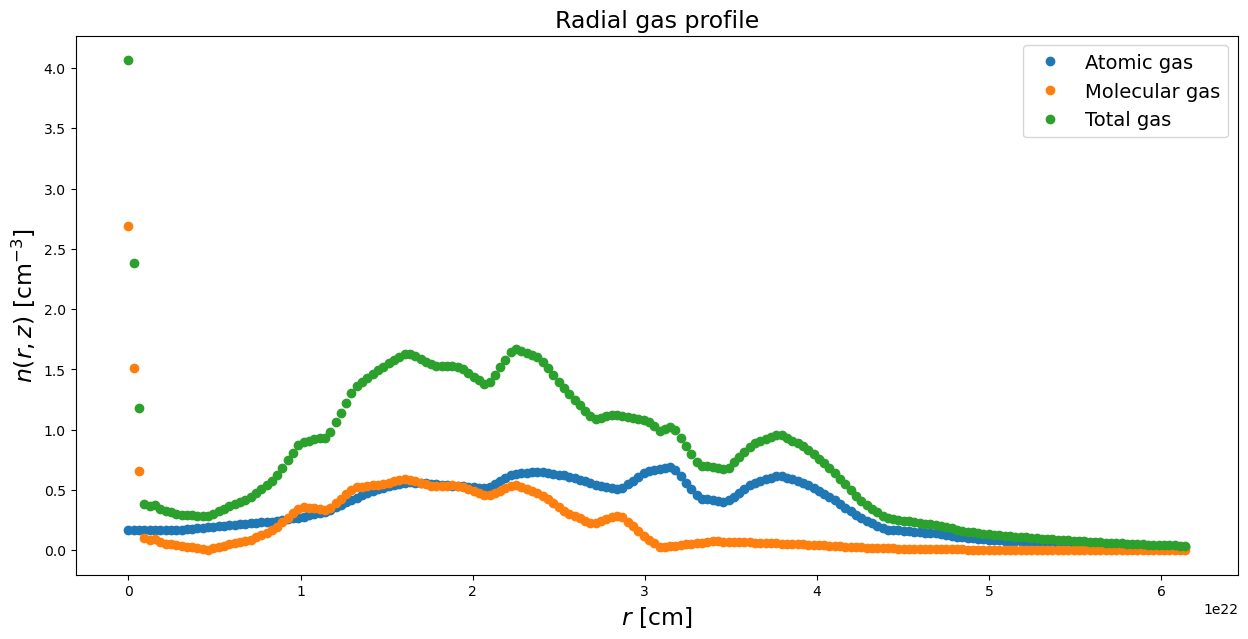

In [39]:
# Plot at z=0
height0 = min(np.abs(height))
index_plot_radius = np.where(np.logical_and(height==height0, height==height0))

plt.figure(figsize=(15, 7))
plt.plot(radius[index_plot_radius], atomic_density[index_plot_radius], 'o', label='Atomic gas')
plt.plot(radius[index_plot_radius], molecular_density[index_plot_radius], 'o', label='Molecular gas')
plt.plot(radius[index_plot_radius], total_density[index_plot_radius], 'o', label='Total gas')
plt.xlabel(r'$r$ [cm]', fontsize=17)
plt.ylabel(r'$n(r,z)$ [cm$^{-3}$]', fontsize=17)
plt.legend(ncol=1, fontsize=14, loc='upper right')
plt.title('Radial gas profile', fontsize=17)
plt.savefig('/Users/luisenriqueespinosacastro/Documents/PhD/Research/Diffusive gamma rays/Diffusive_GammaRay_Emission/Plots/gas_radius.png')

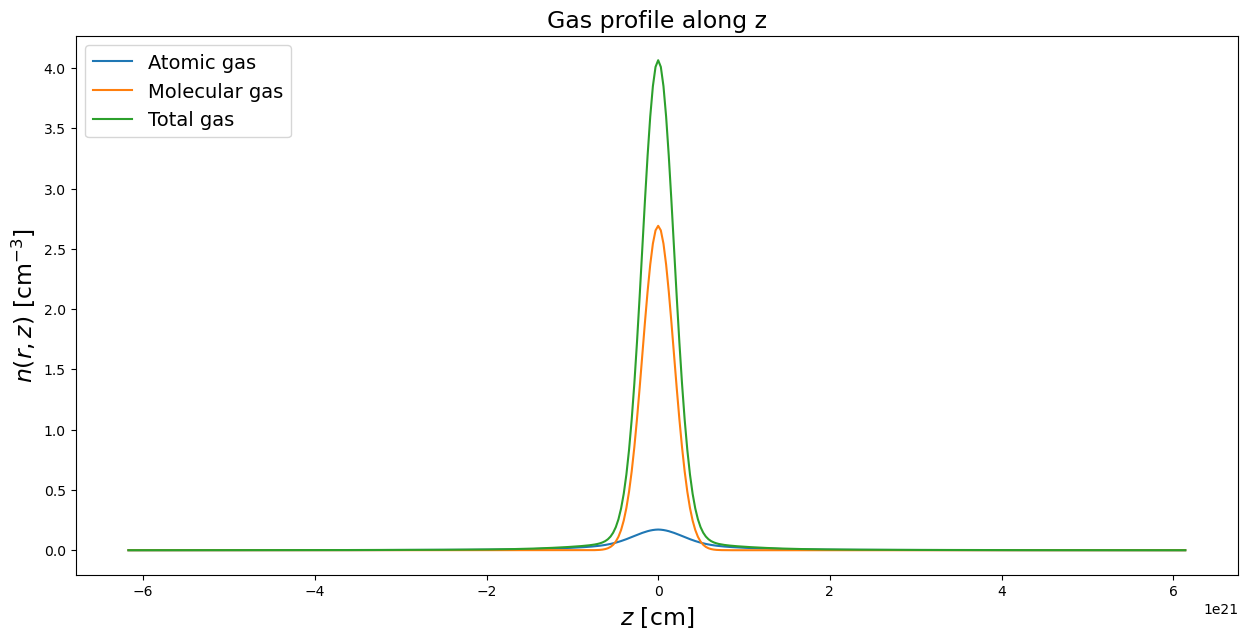

In [40]:
# Plot at r=0
radius0 = min(np.abs(radius))
index_plot_height = np.where(np.logical_and(radius==radius0, radius==radius0))

plt.figure(figsize=(15, 7))
plt.plot(height[index_plot_height], atomic_density[index_plot_height], label='Atomic gas')
plt.plot(height[index_plot_height], molecular_density[index_plot_height], label='Molecular gas')
plt.plot(height[index_plot_height], total_density[index_plot_height], label='Total gas')
plt.xlabel(r'$z$ [cm]', fontsize=17)
plt.ylabel(r'$n(r,z)$ [cm$^{-3}$]', fontsize=17)
plt.legend(ncol=1, fontsize=14, loc='upper left')
plt.title('Gas profile along z', fontsize=17)
plt.savefig('/Users/luisenriqueespinosacastro/Documents/PhD/Research/Diffusive gamma rays/Diffusive_GammaRay_Emission/Plots/gas_height.png')

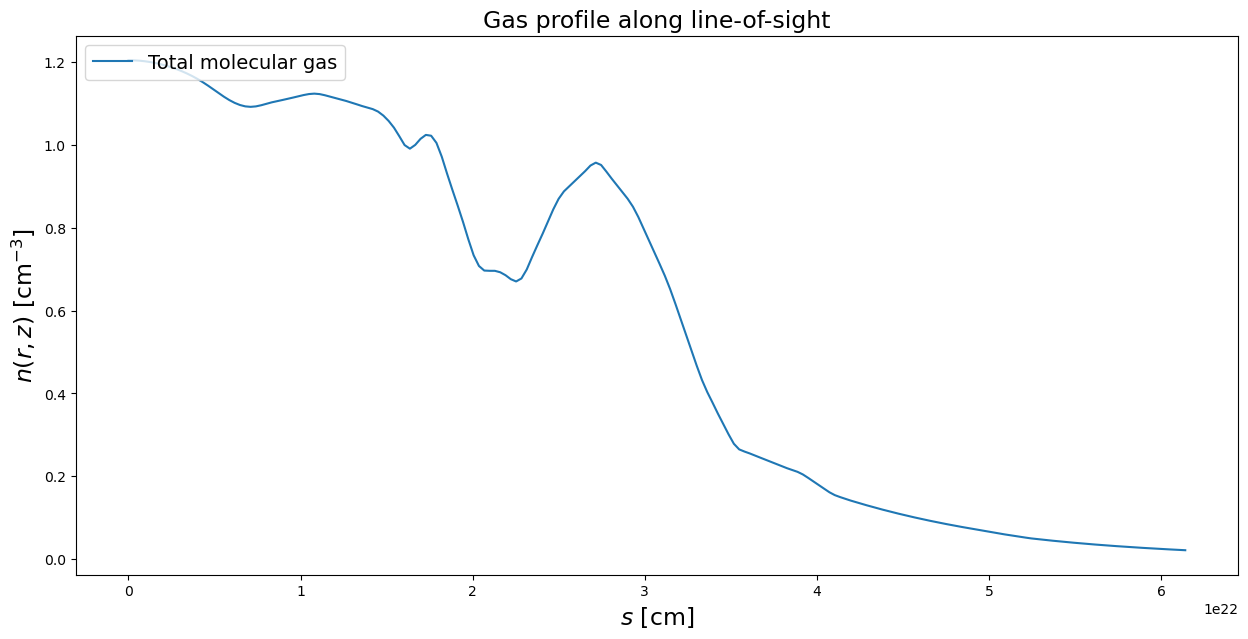

In [44]:
s = np.arange(0, 20, 0.1) * 3.08567758128e21

plt.figure(figsize=(15, 7))
plt.plot(s, n_GALPROP(s, 90, 90), label='Total molecular gas')
plt.xlabel(r'$s$ [cm]', fontsize=17)
plt.ylabel(r'$n(r,z)$ [cm$^{-3}$]', fontsize=17)
#plt.xlim(0, 20)
#plt.ylim(0, 1.5)
plt.legend(ncol=1, fontsize=14, loc='upper left')
plt.title('Gas profile along line-of-sight', fontsize=17)
plt.savefig('/Users/luisenriqueespinosacastro/Documents/PhD/Research/Diffusive gamma rays/Diffusive_GammaRay_Emission/Plots/gas_los.png')